# Predicting with ML

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:

# Read CSV files into dataframes

# File paths
path = 'Data\parkinsons_updrs.data'


# Using pd.read_csv() method to read the data into a pandas dataframe
prediction_df = pd.read_csv(path)

# Display the first 5 rows of the dataframe to show the data was read in properly
print(prediction_df.head())

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [3]:

y= prediction_df[['motor_UPDRS']]
X = prediction_df.drop(columns=['subject#','age','test_time','motor_UPDRS','total_UPDRS'])


# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create scaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(X_train)

# Scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [5]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=0)
}

In [6]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = [mae,r2]

results

C:\Users\wemlh\AppData\Local\Temp\ipykernel_5780\3159239396.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
e:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Linear Regression': [6.603477304917329, 0.10283210226663653],
 'Decision Tree': [6.7262897208985715, -0.2977074197266958],
 'Random Forest': [5.106207330837305, 0.3789663312838665],
 'Gradient Boosting': [5.818998461319579, 0.26308032855574737]}

In [7]:

# Prepare data for the plots
mae_values = [result[0] for result in results.values()]
r2_values = [result[1] for result in results.values()]
model_names = list(results.keys())

In [8]:
mae_values
r2_values
model_names

['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

In [9]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'MAE Values for Different Models')

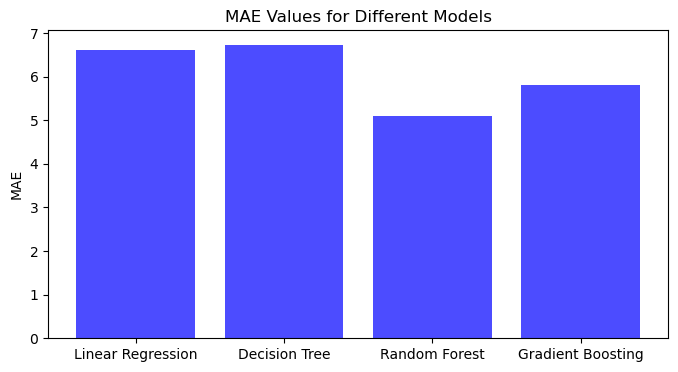

In [10]:
positions = np.arange(len(model_names))
plt.figure(figsize=(8, 4))
plt.bar(positions, mae_values, align='center', alpha=0.7, color='b')
plt.xticks(positions, model_names)
plt.ylabel('MAE')
plt.title('MAE Values for Different Models')


Text(0.5, 1.0, 'R2 Values for Different Models')

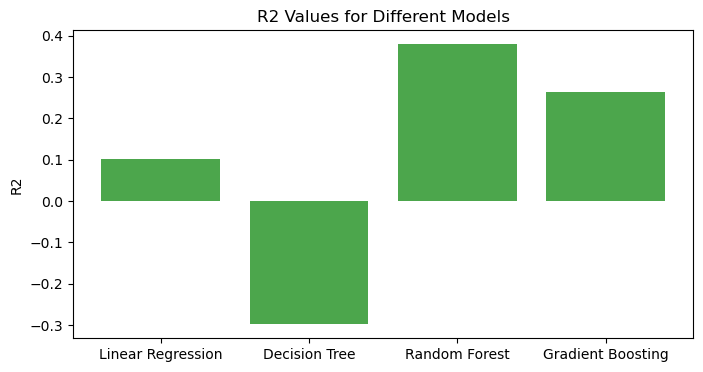

In [11]:
plt.figure(figsize=(8, 4))
plt.bar(positions, r2_values, align='center', alpha=0.7, color='g')
plt.xticks(positions, model_names)
plt.ylabel('R2')
plt.title('R2 Values for Different Models')

In [12]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10)

# Evaluate the model
predictions = model.predict(X_test_scaled)




Epoch 1/100

441/441 [==============================] - 1s 921us/step - loss: 110.8182
Epoch 2/100
441/441 [==============================] - 0s 866us/step - loss: 55.0476
Epoch 3/100
441/441 [==============================] - 0s 839us/step - loss: 50.6781
Epoch 4/100
441/441 [==============================] - 0s 842us/step - loss: 48.0872
Epoch 5/100
441/441 [==============================] - 0s 859us/step - loss: 46.7883
Epoch 6/100
441/441 [==============================] - 0s 871us/step - loss: 44.5760
Epoch 7/100
441/441 [==============================] - 0s 855us/step - loss: 43.7741
Epoch 8/100
441/441 [==============================] - 0s 881us/step - loss: 42.6095
Epoch 9/100
441/441 [==============================] - 0s 859us/step - loss: 41.9178
Epoch 10/100
441/441 [==============================] - 0s 867us/step - loss: 41.3865
Epoch 11/100
441/441 [==============================] - 0s 866us/step - loss: 40.3553
Epoch 12/100
441/441 [==============================] - 0s

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
mae_nn = model.evaluate(X_test_scaled, y_test, verbose=0)

In [15]:
mae_nn

39.382442474365234